<h1> experiment ideas : </h1>
<h3>
    <ol>
        <li> you saw that KNN is able to match similarities in orientation as well , which is not technically a class-specific descriptor. Now isolate class specific information, and intra-class differentiators like orientation information. 
        </li>
    </ol>    
</h3>

<h1> SETUP </h1>

In [23]:
import torch
import os
import cv2
import supervision as sv
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import cv2

from groundingdino.util.inference import Model

import sys

def include_utils():
    parent_directory = os.path.abspath('/app/utils')
    sys.path.append(parent_directory)

include_utils()

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

from utils.gdsr_utils import check_model_paths

check_model_paths()


cuda
../bin/model_files/groundingdino_swint_ogc.pth  exists
../GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py  exists
../bin/model_files/sam_vit_h_4b8939.pth  exists


# YOLO EMBEDDINGS NEAREST NEIGHBOURS

class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane.jpg
object_ind : 0
class name : dog
source path : /app/data/images/embedding_tester/dog_3.jpg
object_ind : 16
class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane_2.jpg
object_ind : 1
class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane_3.jpg
object_ind : 2
class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane_2.jpg
object_ind : 1
class name : dog
source path : /app/data/images/embedding_tester/dog_2.jpg
object_ind : 15
class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane.jpg
object_ind : 0
class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane_3.jpg
object_ind : 2
class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane_3.jpg
object_ind : 2
class name : dog
source path : /app/data/images/embedding_tester/dog_3.jpg
object_ind : 16
class name : aero

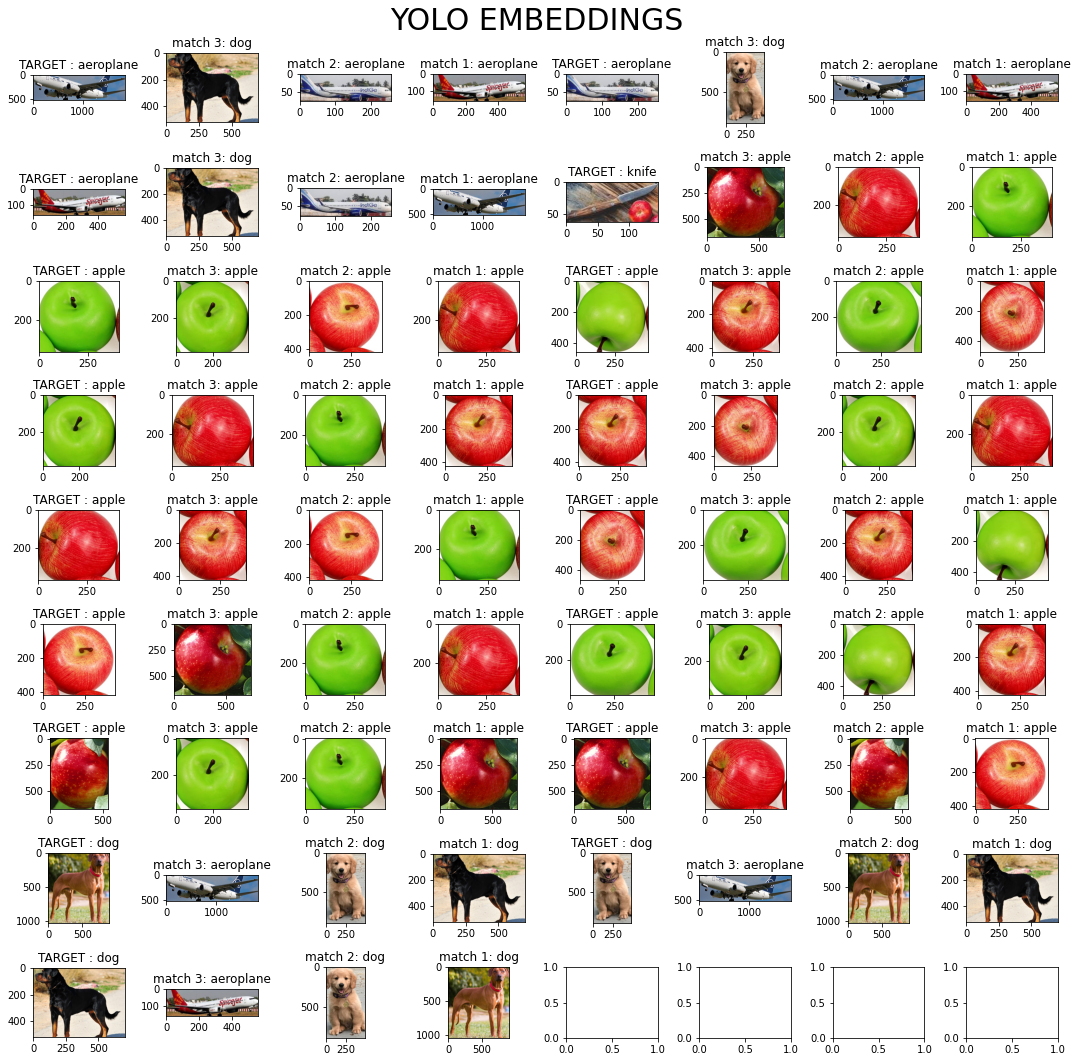

In [1]:
import os
import uuid
import numpy as np

from utils.data_utils import load_object_from_file
from utils.viz_utils import concise_ims_and_plots, plot_neighbours
from utils.distance_utils import get_k_nearest


results_path = "/app/bin/results/"


embedding_matrix = load_object_from_file(os.path.join(results_path,"embedding_matrix_2f6dd8bd6b585368b23d5b7e6e065772_yolo.pkl"))
embedding_details = load_object_from_file(os.path.join(results_path, "embedding_details_2f6dd8bd6b585368b23d5b7e6e065772_yolo.pkl"))

neighbours_inds = get_k_nearest(embedding_matrix, embedding_details["class_names"], 3)

plot_neighbours(embedding_details, neighbours_inds, masks_available = False, title = 'YOLO EMBEDDINGS')



# RESNET EMBEDDINGS

class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane.jpg
object_ind : 0
class name : apple
source path : /app/data/images/embedding_tester/apple_2.jpg
object_ind : 10
class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane_2.jpg
object_ind : 1
class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane_3.jpg
object_ind : 2
class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane_2.jpg
object_ind : 1
class name : apple
source path : /app/data/images/embedding_tester/apple_1.jpeg
object_ind : 3
class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane.jpg
object_ind : 0
class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane_3.jpg
object_ind : 2
class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane_3.jpg
object_ind : 2
class name : apple
source path : /app/data/images/embedding_tester/apple_1.jpeg
object_ind : 3
class

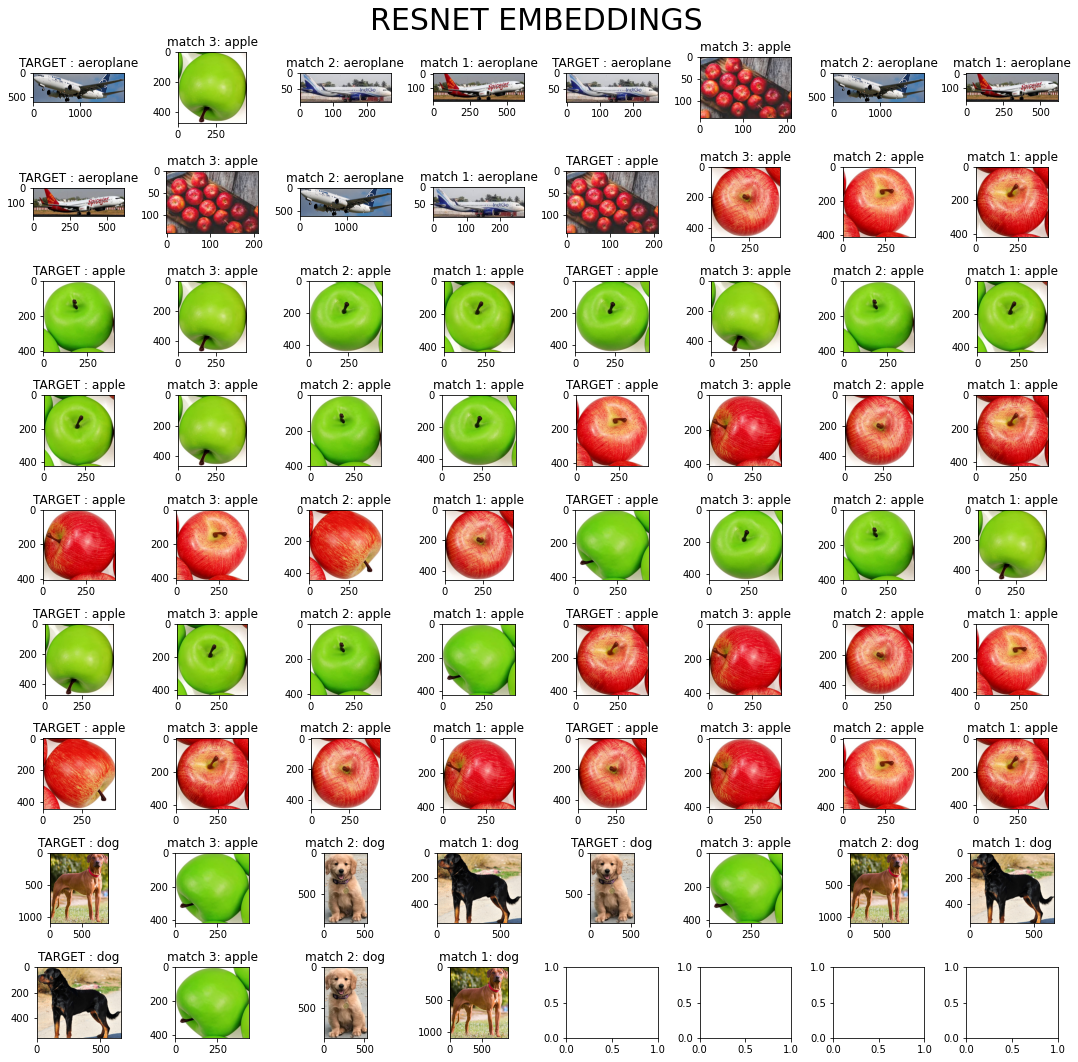

In [2]:
import os
import uuid
import numpy as np

from utils.data_utils import load_object_from_file
from utils.viz_utils import concise_ims_and_plots, plot_neighbours
from utils.distance_utils import get_k_nearest


results_path = "/app/bin/results/"


embedding_matrix = load_object_from_file(os.path.join(results_path,"embedding_matrix_bf0a8f0be08854a59dccf7b0ba0bb93f_gdsr.pkl"))
embedding_details = load_object_from_file(os.path.join(results_path, "embedding_details_bf0a8f0be08854a59dccf7b0ba0bb93f_gdsr.pkl"))

neighbours_inds = get_k_nearest(embedding_matrix, embedding_details["class_names"], 3)

plot_neighbours(embedding_details, neighbours_inds, masks_available = False, title = 'RESNET EMBEDDINGS')



# insights
<ol>
    <li> <b> embeddings capture similarities and differences within samples of a single class</b> : When we a train a neural network on a classification task, like the model used for extracting embeddings here : Resnet 50, we expect that the final layer capture features that only differentiate different classes, i.e, what defines an apple, and more specifically, what differentiates an apple from the other classes on which the model was trained. <br><br>BUT, <b> we see that the model is able to tell the similarity between orientations of an almost identical sample of the same class as well.</b><br><br> For instance , in the first target of the 3rd row, we see that the staw is roughly in the middle of the apple, pointing north-east, and we find the closest 2 matches to be in similar orientations as well, whereas an instance where the stalk is at the bottom left position is considered to be more distant.</li>
    
       